In [30]:
# Imports
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import scipy.stats as stats

plt.style.use("dark_background")
pd.pandas.set_option("display.max_columns", None)


### Data import

In [31]:
data = pd.read_csv("train.csv")

print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
data = data.drop("Id", axis=1)

### Explore Target Variable

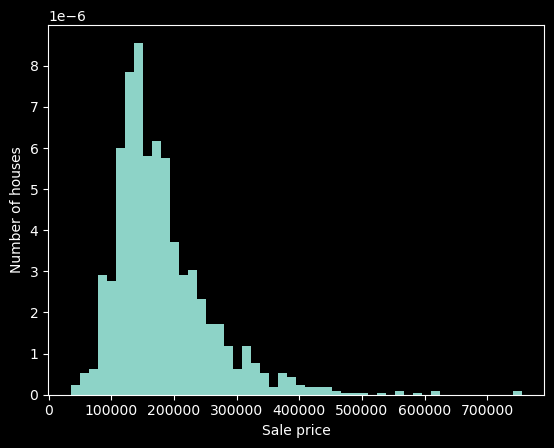

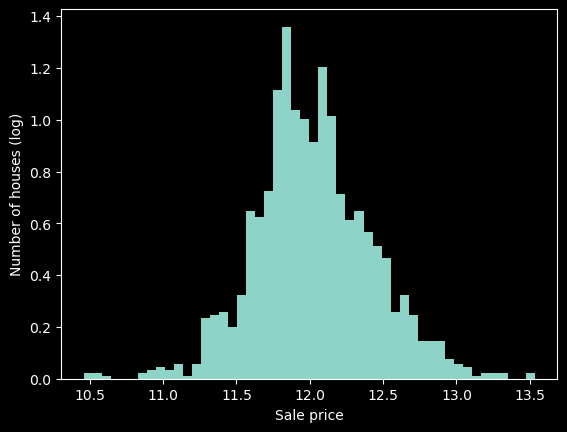

In [33]:
# target histogram
plt.figure()
plt.hist(data["SalePrice"], bins=50, density=True)
plt.ylabel("Number of houses")
plt.xlabel("Sale price")
plt.show()

# logaritmic target histogram
plt.figure()
plt.hist(np.log(data["SalePrice"]), bins=50, density=True)
plt.ylabel("Number of houses (log)")
plt.xlabel("Sale price")
plt.show()


### Explore variable types

In [34]:
# show categorical variables
cat_vars = [var for var in data.columns if data[var].dtype == 'object']

# add MSSubClass
cat_vars += ["MSSubClass"]

# numver of cat vars
print("Number of categorical variables:", len(cat_vars))

# cast all categorical variables to object
data[cat_vars] = data[cat_vars].astype("object")


Number of categorical variables: 44


In [35]:
# Number of numerical variables
num_vars = [var for var in data.columns
            if var not in cat_vars
            and var != 'SalePrice']

# number of numerical variables
print("Number of numerical variables:", len(num_vars))

Number of numerical variables: 35


### Missing values

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


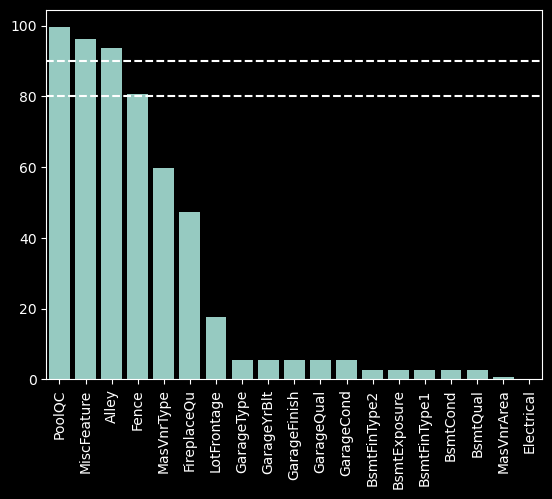

In [36]:
# Variables with NaNs
vars_with_nan = [var for var in data.columns
                 if data[var].isna().sum() > 0]

# Show percentage of categories with NaNs
print(
    data[vars_with_nan].isna().mean().sort_values(ascending=False) * 100)

# Plot percentage of missing data
_, ax = plt.subplots()
sns.barplot(
    data[vars_with_nan].isna().mean().sort_values(ascending=False) * 100,
    ax=ax)
ax.axhline(y=90,linestyle="--")
ax.axhline(y=80, linestyle="--")
ax.tick_params(axis='x', rotation=90)
plt.show()

In [37]:
# numerical and categorical data with missing values
cat_nan = [var for var in cat_vars if var in vars_with_nan]
num_nan = [var for var in num_vars if var in vars_with_nan]

print("Number of categorical variables with NaN:", len(cat_nan))
print("Number of numerical variables with NaN:", len(num_nan))

print(cat_nan, num_nan)

Number of categorical variables with NaN: 16
Number of numerical variables with NaN: 3
['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'] ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


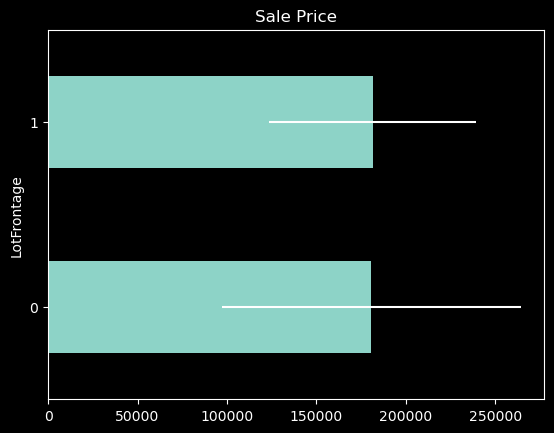

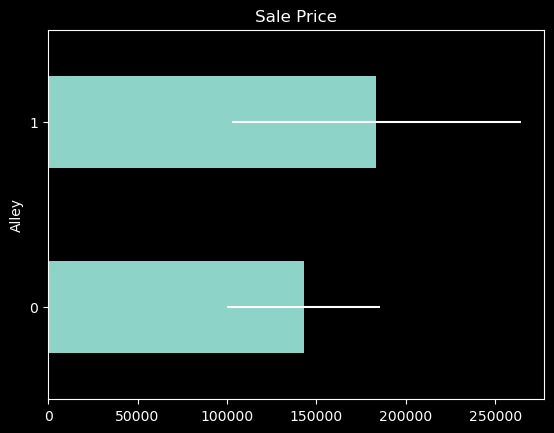

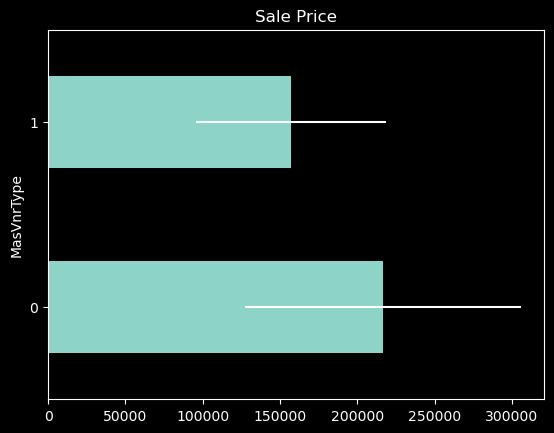

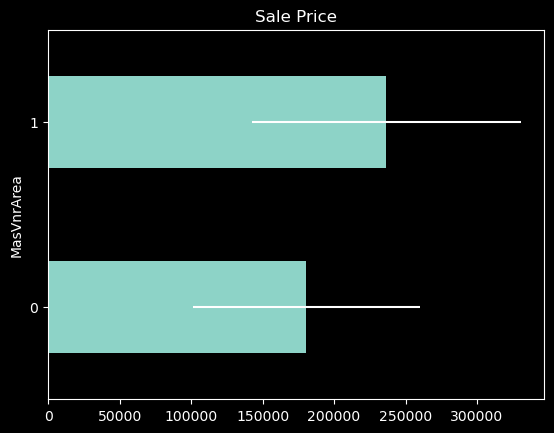

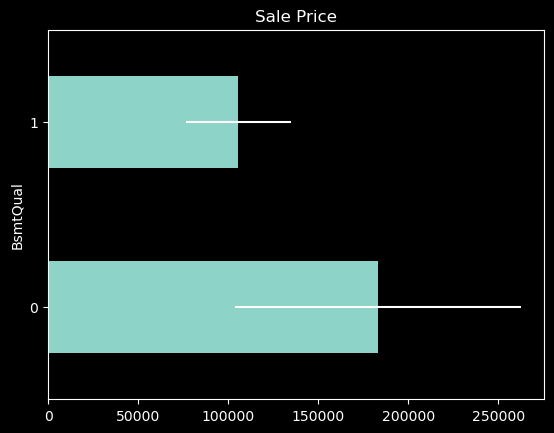

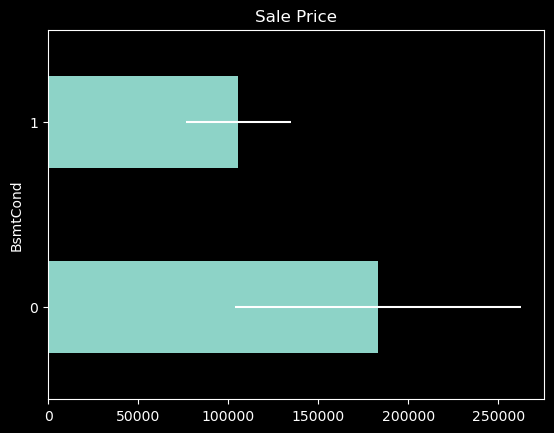

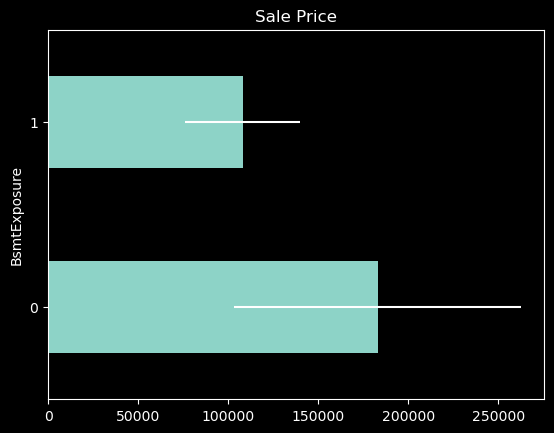

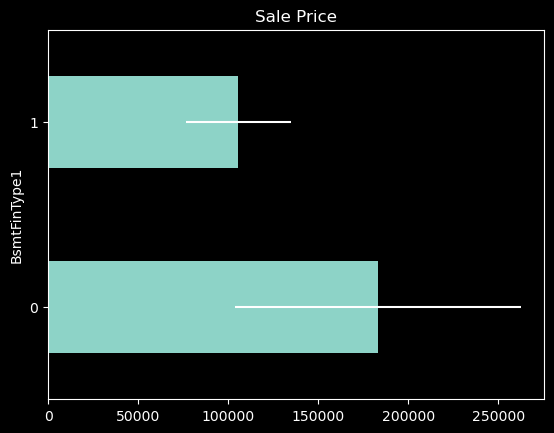

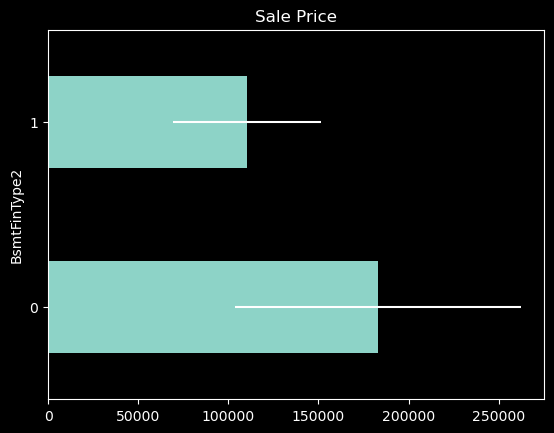

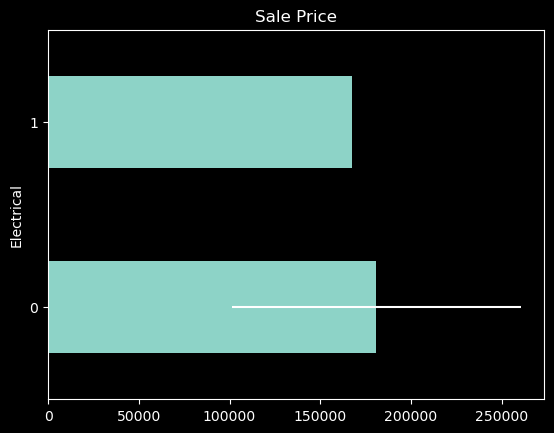

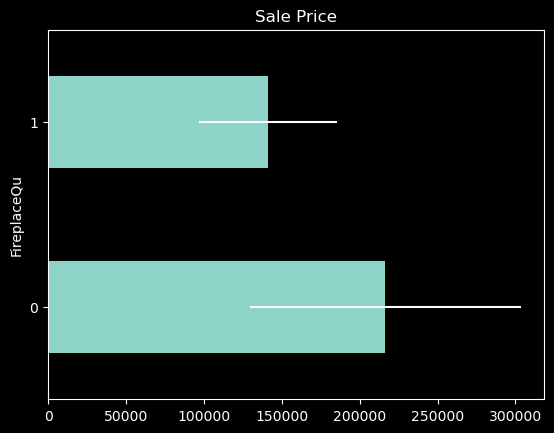

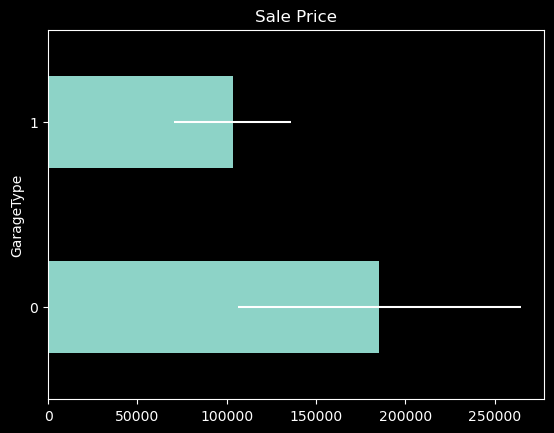

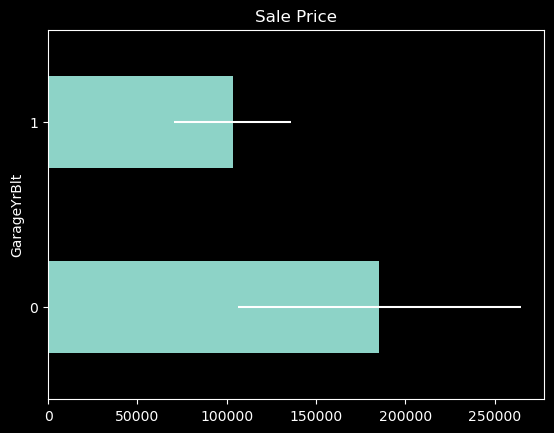

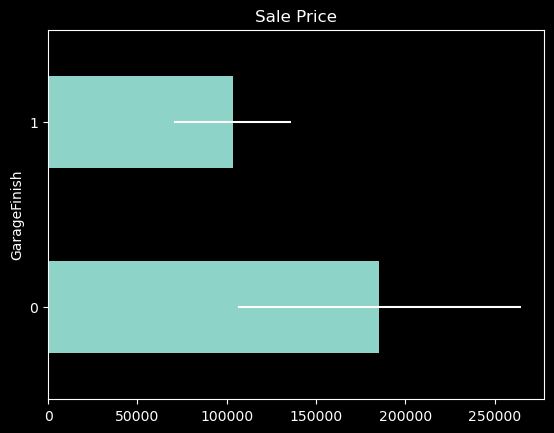

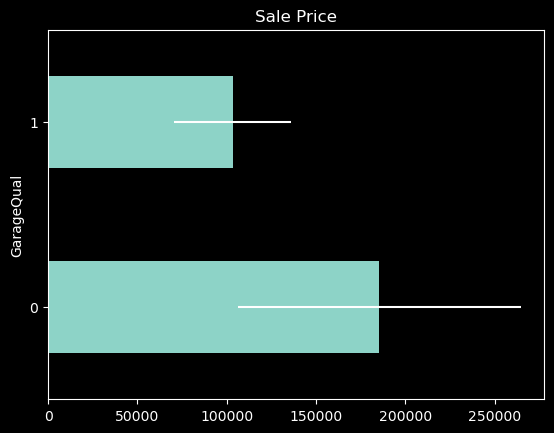

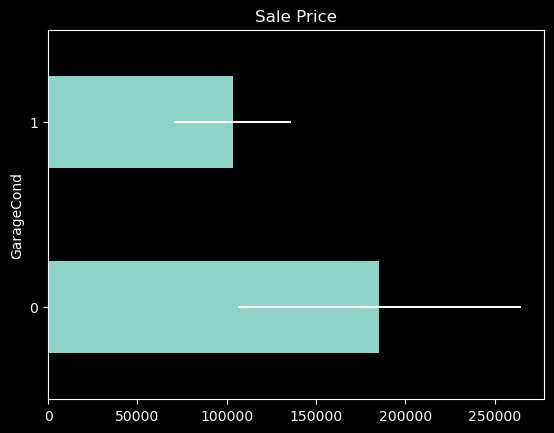

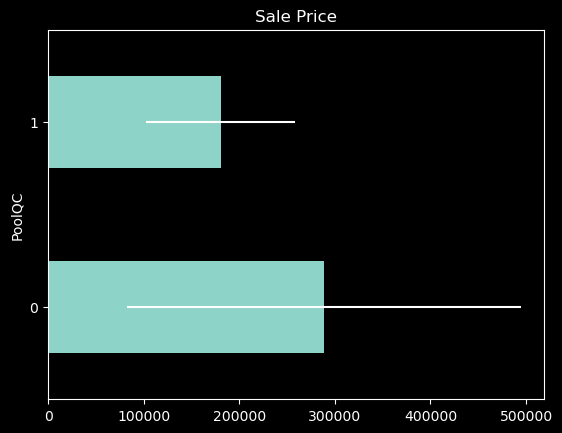

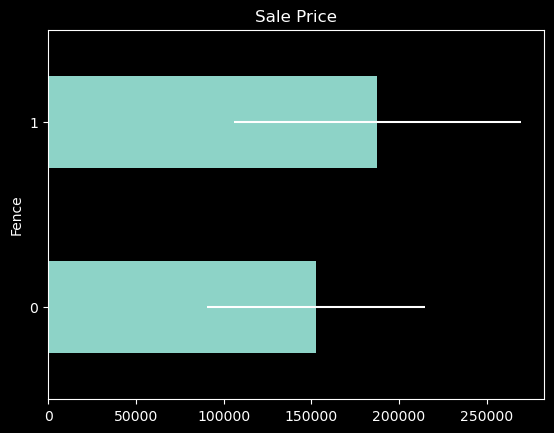

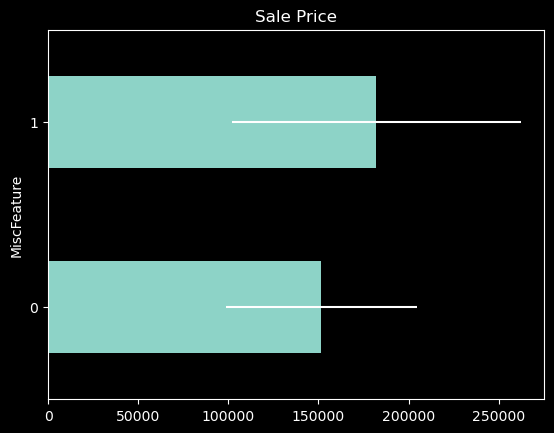

In [38]:
# investigate if missing values have influence on the sale price
def analysis_nan_values(df, var):
    df = df.copy()
    
    df[var] = np.where(df[var].isna(), 1, 0)
    
    _, ax = plt.subplots()
    tmp = (df
           .groupby(var)["SalePrice"]
           .agg(['mean', 'std'])
           .plot(kind="barh",
                 y='mean',
                 legend=False,
                 xerr='std',
                 title='Sale Price',
                 ax=ax))
    plt.show()

for var in vars_with_nan:
    analysis_nan_values(data, var)

### Explore temporal variables

In [39]:
# capture temporal variables
year_vars = [var for var in num_vars
             if 'Yr' in var or 'Year' in var]

# explore year variables
print(year_vars)
for var in year_vars: print(var, data[var].unique(), sep='\n')

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
YearBuilt
[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd
[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt
[2003. 1976. 2001. 1998. 2000.

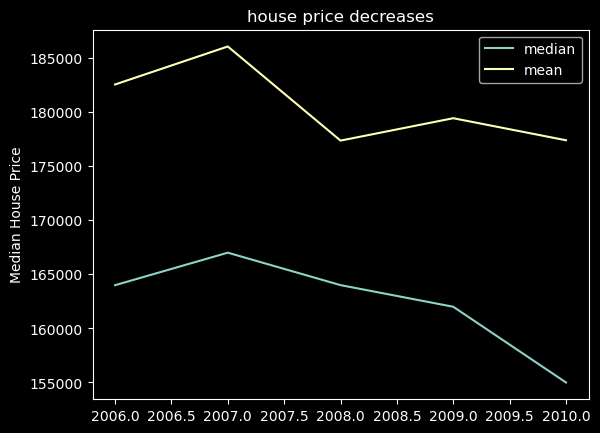

In [40]:
# Price evolution versus years
plt.figure()
plt.plot(data.groupby('YrSold')['SalePrice'].agg(['median', 'mean']))
plt.legend(['median', 'mean'])
plt.ylabel('Median House Price')
plt.title('house price decreases')
plt.show()

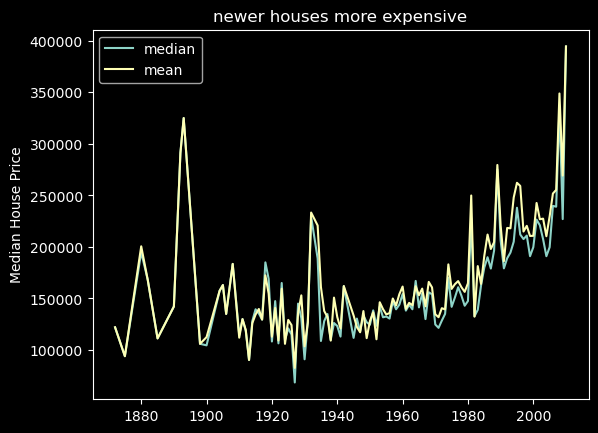

In [41]:
# sale price vs build year
plt.figure()
plt.plot(data.groupby('YearBuilt')['SalePrice'].agg(['median', 'mean']))
plt.legend(['median', 'mean'])
plt.ylabel('Median House Price')
plt.title('newer houses more expensive')
plt.show()

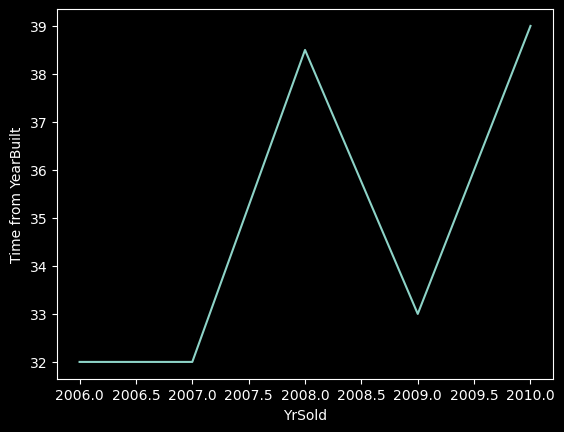

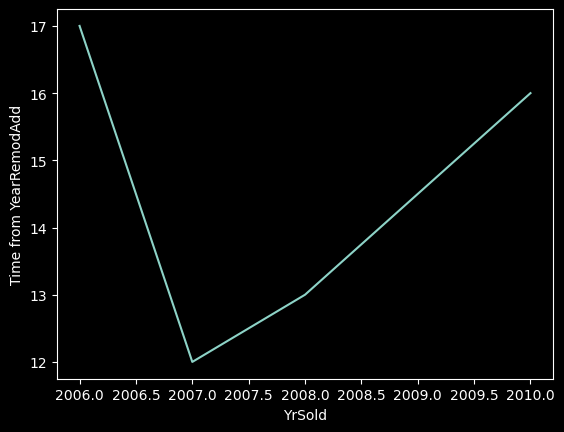

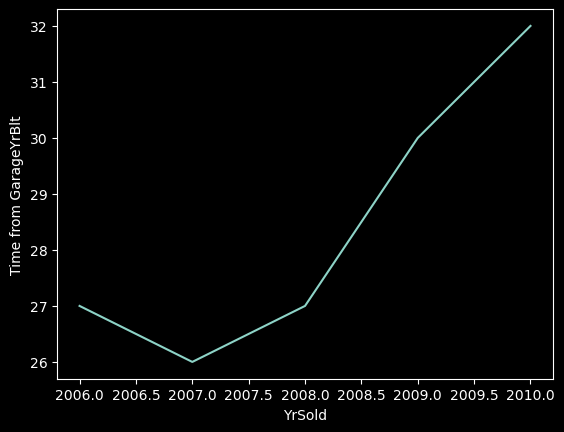

We are selling older houses in more recent years!


In [42]:
# Check if we are selling older houses in more recent years
def analysis_year_vars(df, var):
    
    df = df.copy()
    df[var] = df['YrSold'] - df[var]
    
    plt.figure()
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.show()
    
for var in year_vars:
    if var != 'YrSold':
        analysis_year_vars(data, var)

print("We are selling older houses in more recent years!")

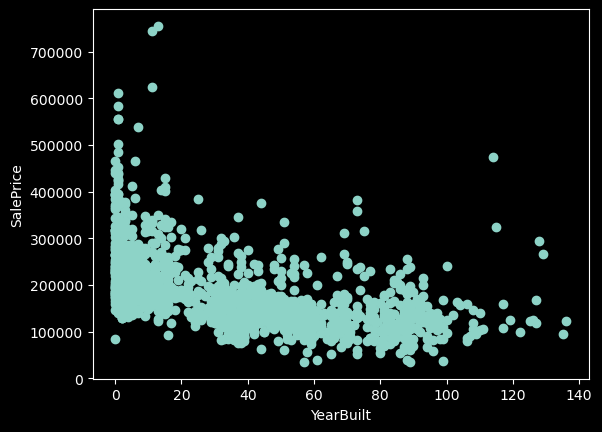

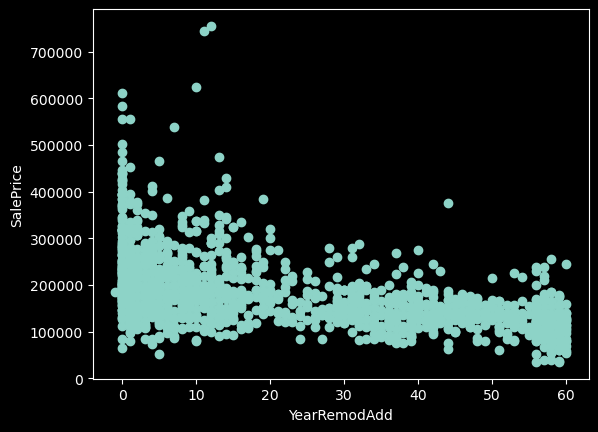

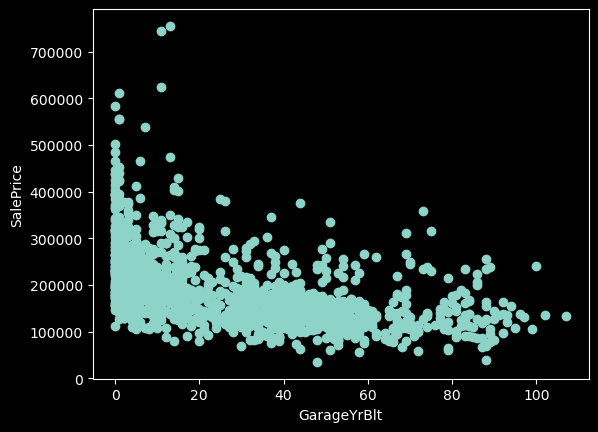

Sale price drops if age of house increases


In [44]:
# See relation between sale price and age of the house
def analysis_year_vars(df, var):
    df = df.copy()
    df[var] = df['YrSold'] - df[var]
    
    plt.figure()
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()
    
for var in year_vars:
    if var != 'YrSold':
        analysis_year_vars(data, var)
    
    
print("Sale price drops if age of house increases")

### Explore discrete variables

In [ ]:
# select discrete variables
discr_vars = [
    var for var in num_vars if len(
        data[var].unique()) < 20
    and var not in year_vars
]

print("Number of discrete variables:", len(discr_vars))

data[discr_vars].head()

Number of discrete variables: 13


,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


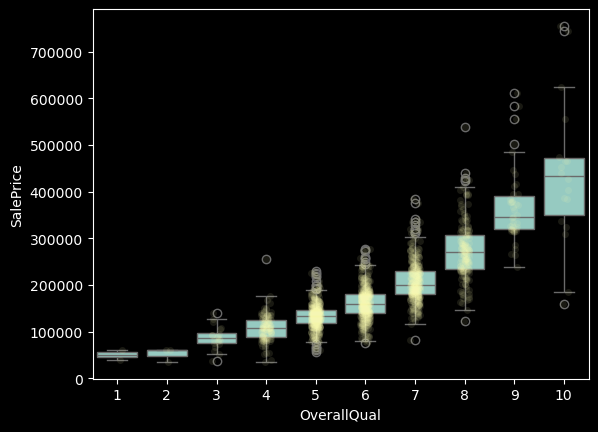

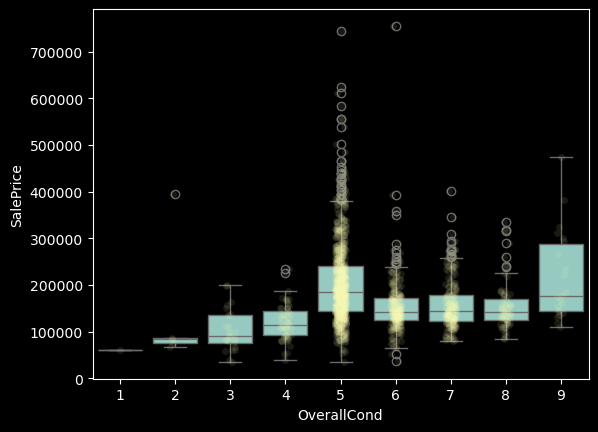

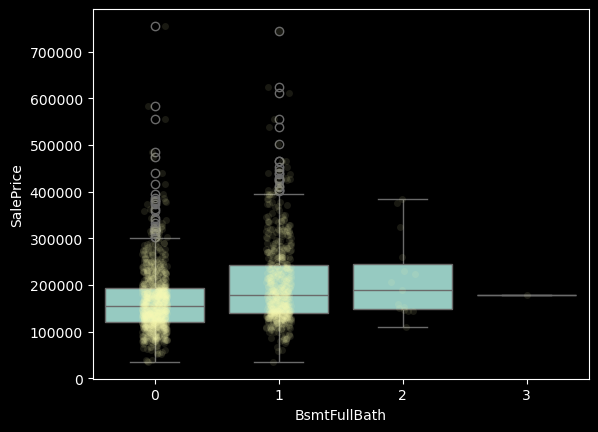

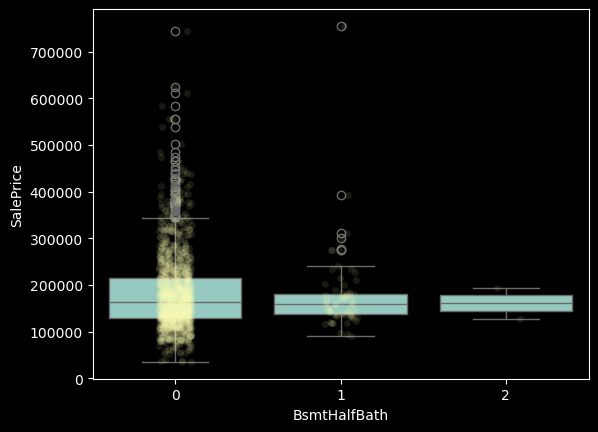

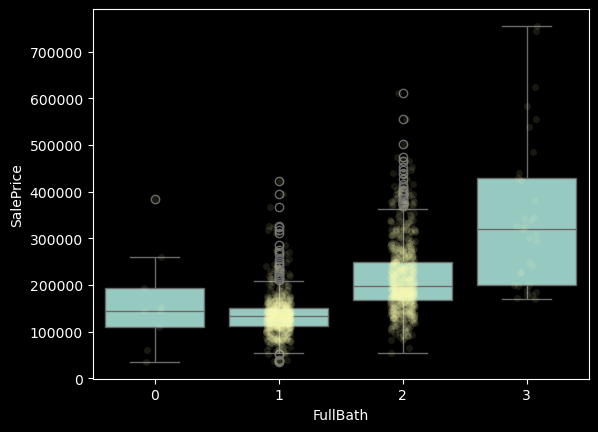

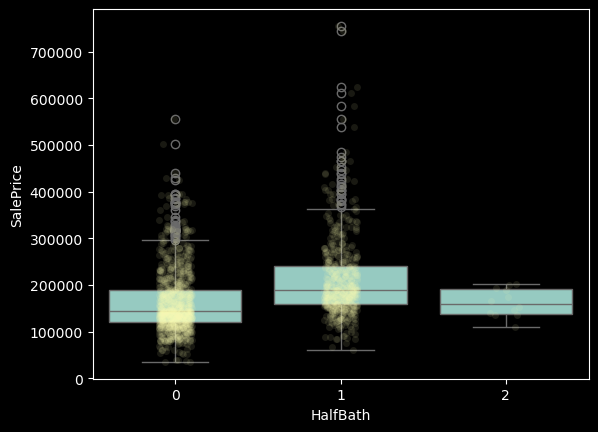

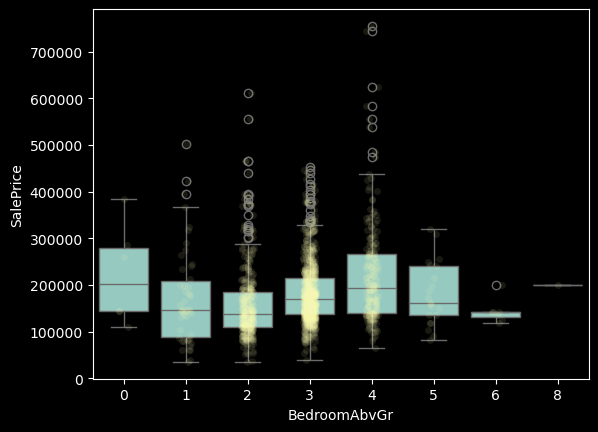

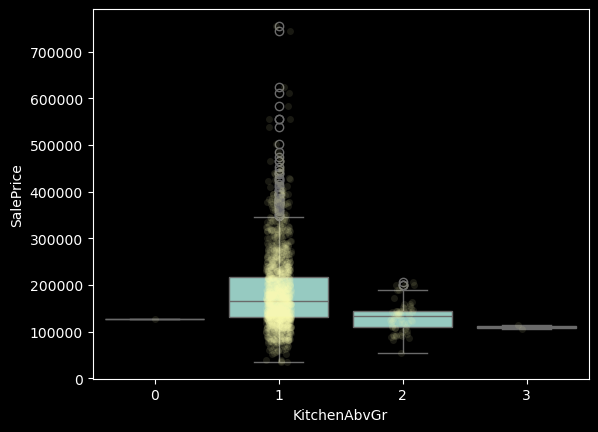

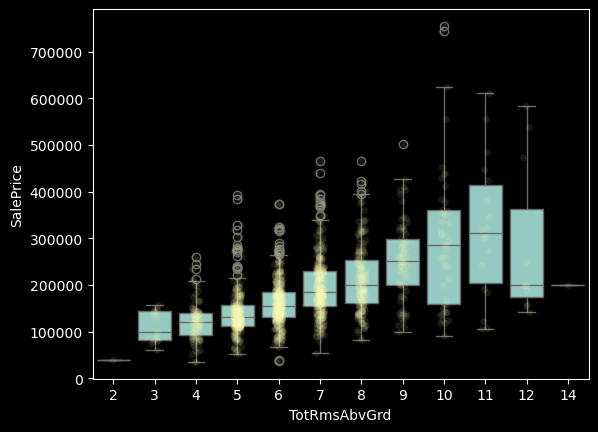

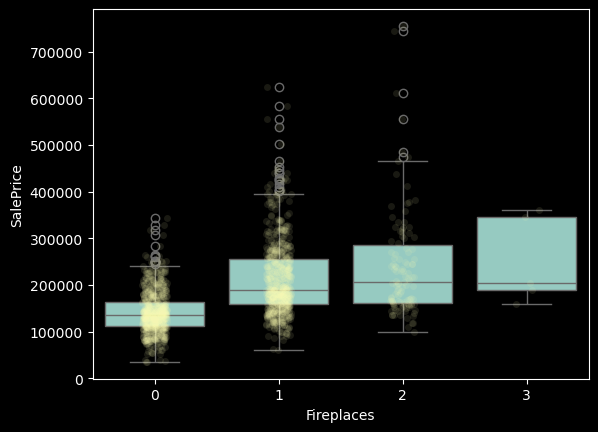

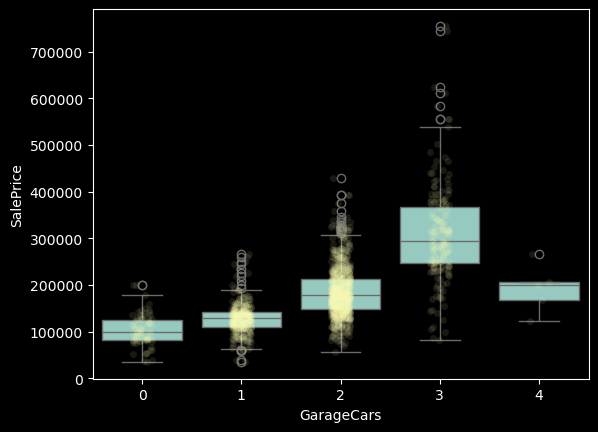

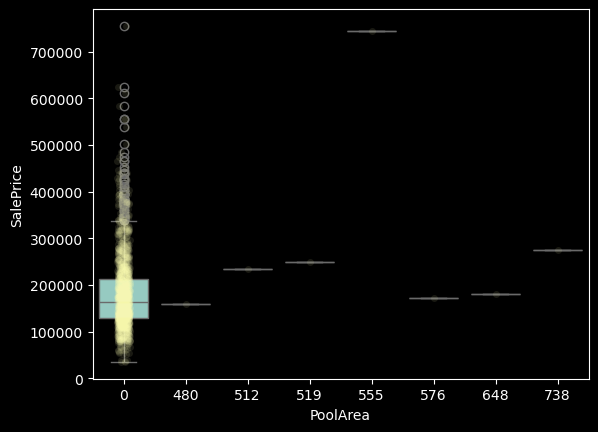

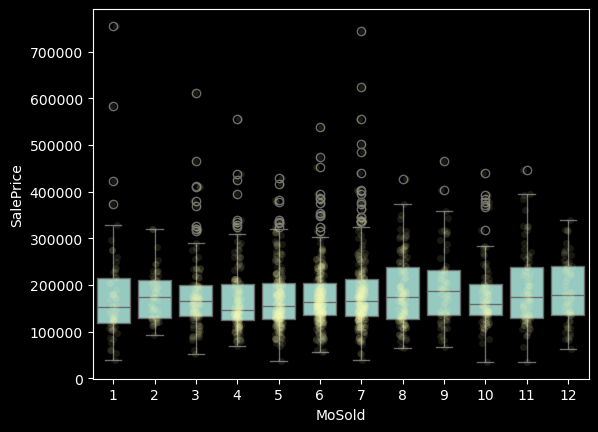

In [54]:
# plot the sale price against all the discrete variables
for var in discr_vars:
    _, ax = plt.subplots()
    sns.boxplot(x=var, y='SalePrice', data=data, ax=ax)
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1,
                  alpha=0.1, ax=ax)